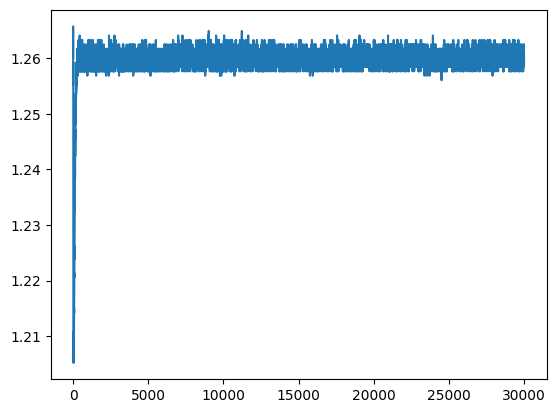

30001


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f514cc17438>

In [12]:
#Libraries to import
using SerialPorts
using PyPlot
using FFTW 
list_serialports()

a = []
i = 0
b = ""

ser = SerialPort("/dev/ttyACM2", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

a=split(b, ("\r\n"))

println(length(a))   
    
ac = []
i=1

while (i<length(a))
 
    push!(ac,parse(Int,(a[i])))        

    i+=1
end

dummy = (3.3/4096).*ac

figure()
plot(dummy)

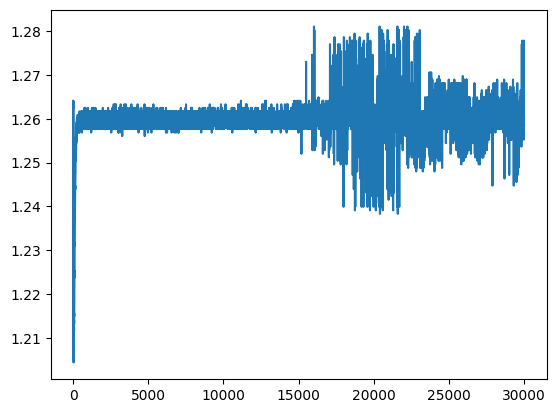

30001


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f514c9b7b38>

In [15]:


a = []
i = 0
b = ""

ser = SerialPort("/dev/ttyACM2", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

a=split(b, ("\r\n"))

println(length(a))   
    
ac = []
i=1

while (i<length(a))
 
    push!(ac,parse(Int,(a[i])))        

    i+=1
end

match = (3.3/4096).*ac

figure()
plot(match)

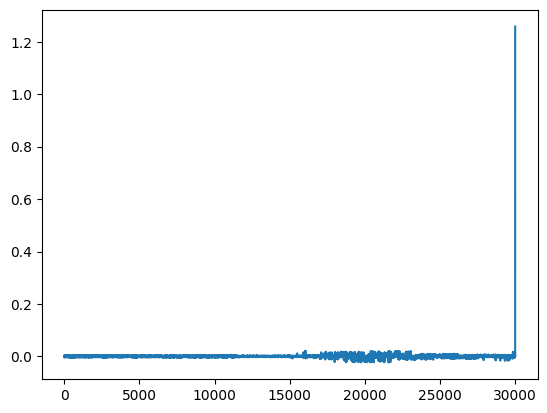

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f514cbe2f28>

In [16]:
for j= 1:length(match)-1
    match[j]=match[j]-dummy[j]
end

figure()
plot(match)